In [13]:
import os
import sys
import json
import yaml
import torch
import random
import models
import hdbscan, umap
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
from sklearn.manifold import TSNE
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from matplotlib import pyplot as plt
# personal files
from sklearn import metrics
from datasets import MelDataset, vctkDataset, greatbirdDataset, finchbird2, western_bird
##############################################full embedding##############################################
# greatbird dataset
# # ori embedding
# embed_name = 'VAEbase-greatbird_6-c_80.0_1.0-i_10.0_80.0'
# embed_path = "/mnt/work/Animal/output/greatbird" + "/" + embed_name + "/embedding"
# df = pd.read_csv(f'{embed_path}/embedding.csv')
# # caller label
# caller_df = pd.read_csv(f'{embed_path}/caller_label.csv')
# # caller type label
# caller_type_df = pd.read_csv(f'{embed_path}/caller_type_label.csv')
# caller_type_df.head()
##############################################full embedding##############################################
# # greatbird dataset
# # ori embedding
# embed_name = 'VAEbase-greatbird_full_3-c_100.0_0.8-i_10.0_80.0'
# embed_path = "/mnt/work/Animal/output/greatbird" + "/" + embed_name + "/embedding"
# df = pd.read_csv(f'{embed_path}/embedding.csv')
# # caller label
# caller_df = pd.read_csv(f'{embed_path}/caller_label.csv')
# # caller type label
# caller_type_df = pd.read_csv(f'{embed_path}/caller_type_label.csv')
# caller_type_df.head()
##############################################full embedding##############################################
# # greatbird dataset
# # ori embedding
# embed_name = 'VAEbase-greatbird_full_4-c_100.0_0.75-i_10.0_100.0'
# embed_path = "/mnt/work/Animal/output/greatbird" + "/" + embed_name + "/embedding"
# df = pd.read_csv(f'{embed_path}/embedding.csv')
# # caller label
# caller_df = pd.read_csv(f'{embed_path}/caller_label.csv')
# # caller type label
# caller_type_df = pd.read_csv(f'{embed_path}/caller_type_label.csv')
# caller_type_df.head()
##############################################full embedding##############################################
# # greatbird dataset
# # ori embedding
# embed_name = 'VAEbase-greatbird_full_6-c_100.0_0.5-i_10.0_80.0'
# embed_path = "/mnt/work/Animal/output/greatbird" + "/" + embed_name + "/embedding"
# df = pd.read_csv(f'{embed_path}/embedding.csv')
# # caller label
# caller_df = pd.read_csv(f'{embed_path}/caller_label.csv')
# # caller type label
# caller_type_df = pd.read_csv(f'{embed_path}/caller_type_label.csv')
# caller_type_df.head()
##############################################full embedding##############################################
##############################################for paper##############################################
# greatbird dataset
# ori embedding
embed_name = 'VAEbase-greatbird_full_8-c_100.0_0.4-i_10.0_100.0'
embed_path = "/mnt/work/Animal/output/greatbird" + "/" + embed_name + "/embedding"
df = pd.read_csv(f'{embed_path}/embedding.csv')
# caller label
caller_df = pd.read_csv(f'{embed_path}/caller_label.csv')
# caller type label
caller_type_df = pd.read_csv(f'{embed_path}/caller_type_label.csv')
caller_type_df.head()


# # greatbird dataset
# # ori embedding
# embed_name = 'VAEbase-greatbird_full_8-c_100.0_0.4-i_10.0_100.0'
# embed_path = "/mnt/work/Animal/output/greatbird" + "/" + embed_name + "/embedding_short"
# df = pd.read_csv(f'{embed_path}/embedding.csv')
# # caller label
# caller_df = pd.read_csv(f'{embed_path}/caller_label.csv')
# # caller type label
# caller_type_df = pd.read_csv(f'{embed_path}/caller_type_label.csv')
# caller_type_df.head()
##############################################full embedding##############################################
# # greatbird dataset
# # ori embedding
# embed_name = 'VAEbase-greatbird_full_6-c_100.0_0.7-i_10.0_80.0'
# embed_path = "/mnt/work/Animal/output/greatbird" + "/" + embed_name + "/embedding"
# df = pd.read_csv(f'{embed_path}/embedding.csv')
# # caller label
# caller_df = pd.read_csv(f'{embed_path}/caller_label.csv')
# # caller type label
# caller_type_df = pd.read_csv(f'{embed_path}/caller_type_label.csv')
# caller_type_df.head()
#########################################################################################################
# # greatbird dataset
# # wav2vec2 embedding 
# embed_path = '/mnt/work/Animal/output/embeddings/wav2vec2/first_ex'

# df = pd.read_csv(f'{embed_path}/embedding.csv')
# df.head()

# # caller type label
# caller_type_df = pd.read_csv(f'{embed_path}/caller_type_label.csv')
# caller_type_df.head
#########################################################################################################
# # greatbird dataset
# # hubert embedding
# embed_path = '/mnt/work/Animal/output/embeddings/hubert/first_ex'

# df = pd.read_csv(f'{embed_path}/embedding.csv')
# df.head()

# # caller type label
# caller_type_df = pd.read_csv(f'{embed_path}/caller_type_label.csv')
# caller_type_df.head
#########################################################################################################
# # greatbird dataset
# # Vq_apc embedding
# embed_path = '/mnt/work/Animal/output/embeddings/vq_apc/first_ex'

# df = pd.read_csv(f'{embed_path}/embedding.csv')
# df.head()

# # caller type label
# caller_type_df = pd.read_csv(f'{embed_path}/caller_type_label.csv')
# caller_type_df.head
#########################################################################################################
# # greatbird dataset
# # Vq_apc embedding
# embed_path = '/mnt/work/Animal/output/greatbird/VAEbase_one-greatbird_one_9-c_10.0_0.0-i_0.0_0.0/embedding'

# df = pd.read_csv(f'{embed_path}/embedding.csv')
# print(df.head())

# # caller type label
# caller_type_df = pd.read_csv(f'{embed_path}/caller_type_label.csv')
# caller_type_df.head()



,W67_0
0,W67_0
1,W67_0
2,W67_0
3,W67_0
4,W67_0


In [10]:
print(df.shape)

# umap
# X = umap.UMAP(n_jobs=-1, n_components=2).fit_transform(df)

# TSNE
X = TSNE(n_components=2, perplexity = 30, n_iter = 1000).fit_transform(df)

(20017, 128)


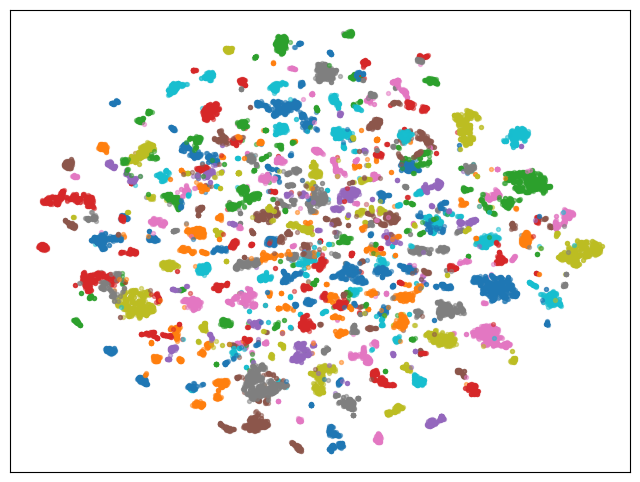

In [11]:
# plot
caller_type_label = np.array(caller_type_df).T
unique_call_type_label = np.unique(caller_type_label)

plt.figure(figsize=(8, 6))
for label in unique_call_type_label:
    label_mask = np.all(caller_type_label == label, axis=0)
    # print('label',label)
    # print('label_mask',label_mask)
    # print('caller_type_label',caller_type_label)
    # Select data for this label
    data_for_label = X[label_mask]
    # Plot the data for this label with a label for the legend
    plt.scatter(data_for_label[:, 0], data_for_label[:, 1], label=label, alpha=0.5, s=8)
    # center prosition
    centroid = np.median(data_for_label, axis=0)
    # text label
    # plt.text(centroid[0], centroid[1], str(label), fontsize=6, color='black', ha='center', va='center')

# Add a legend
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=6)

ax = plt.gca()

# 使用.tick_params()移除刻度线
ax.tick_params(axis='both',          # 应用于x轴和y轴
               which='both',         # 应用于主刻度线和次刻度线
               bottom=False,         # 不显示x轴底部刻度线
               top=False,            # 不显示x轴顶部刻度线
               left=False,           # 不显示y轴左侧刻度线
               right=False,          # 不显示y轴右侧刻度线
               labelbottom=False,    # 不显示x轴刻度标签
               labelleft=False)  

save_path = '/mnt/work/Animal/output/figs'
# proposed
# plt.savefig(save_path+'/'+'proposed.pdf', format='pdf', bbox_inches='tight', edgecolor='none')

# wav2vec2
# plt.savefig(save_path+'/'+'wav2vec2.pdf', format='pdf', bbox_inches='tight', edgecolor='none')

# hubert
plt.savefig(save_path+'/'+'hubert.pdf', format='pdf', bbox_inches='tight', edgecolor='none')


plt.show()
# plt.savefig(save_path+'/'+'vq_apc.pdf', format='pdf', bbox_inches='tight')

In [14]:
# df -> numpy
df_np = df.to_numpy()

# 1 
# W67_0 is just the column's name 
grouped = caller_type_df.groupby('W67_0')

# for indiv, grp in grouped:
#     print(indiv, grp)  
#     print('X group shape',X[grp.index].shape)
# for mcs in [5, 10, 20, 50, 100, 200]:
#     for ms in [None, 3, 5, 10, 20, 30]:
#         for eps in [0.0, 0.01, 0.02, 0.05, 0.1]:
#             for al in ['leaf', 'eom']:
#                 for indiv, grp in grouped:
#                     # print(len(grp.index) - 1)
#                     indiv_nmis = []
#                     if len(grp.index)==1:
#                         continue
#                     clusters = hdbscan.HDBSCAN(min_cluster_size=mcs, 
#                                             min_samples=ms, 
#                                             cluster_selection_epsilon=eps, 
#                                             core_dist_n_jobs=-1, 
#                                             cluster_selection_method=al).fit_predict(X[grp.index])
#                     # print(grp.index)
#                     # print(clusters.astype(int))
#                     mask = ~grp.W67_0.isna()
#                     clusters, labels = clusters[mask], grp[mask].W67_0
#                     indiv_nmis.append(metrics.normalized_mutual_info_score(labels, clusters))
                    
#                     # print('info',clusters)
#                     # print('labels', labels)
#                     print('nmi', np.mean(indiv_nmis))
# print('max nmi', max(total_nmi))


# 2
X = TSNE(n_components=2, perplexity = 30, n_iter = 1000).fit_transform(df)

total_nmi = []
for n_com in tqdm([4, 8, 16]):
    X = umap.UMAP(n_jobs=-1, n_components=n_com).fit_transform(df)
# for n_com in tqdm([2, 3]): 
#     X = TSNE(n_components=2, perplexity = 30, n_iter = 1000).fit_transform(df)
    for mcs in [5, 10, 20, 50, 100]:
        for ms in [None, 3, 5, 10, 20, 30]:
            for eps in [0.0, 0.01, 0.02, 0.05, 0.1]:
                for al in ['leaf', 'eom']:
                    clusters = hdbscan.HDBSCAN(min_cluster_size=mcs, 
                                            min_samples=ms, 
                                            cluster_selection_epsilon=eps, 
                                            core_dist_n_jobs=-1, 
                                            cluster_selection_method=al).fit_predict(X)
                    
                    mask = ~caller_type_df.W67_0.isna()
                    
                    clusters, labels = clusters[mask], caller_type_df[mask].W67_0
                    
                    tnmi = metrics.normalized_mutual_info_score(labels, clusters)

                    # print('clusters', [i for i in clusters])
                    # print('labels', labels)
                    element_counts = Counter(clusters)
                    # print(element_counts)
                    total_nmi.append(round(tnmi,5))
                    print('nmi', round(tnmi,5), 'n_com', n_com,'mcs',mcs, 'ms',ms, 'eps',eps, 'al',al)
                    
print('max nmi', max(total_nmi))


# 3 solo
# clusters = hdbscan.HDBSCAN(min_cluster_size=5, 
#                         min_samples=None, 
#                         cluster_selection_epsilon=0.0, 
#                         core_dist_n_jobs=-1, 
#                         cluster_selection_method='leaf').fit_predict(X)
# mask = ~caller_type_df.W67_0.isna()
# clusters, labels = clusters[mask], caller_type_df[mask].W67_0
# tnmi = metrics.normalized_mutual_info_score(labels, clusters)
# element_counts = Counter(clusters)

# print(element_counts)
# print('nmi', round(tnmi,3), 'mcs',mcs, 'ms',ms, 'eps',eps, 'al',al)

  0%|          | 0/3 [00:00<?, ?it/s]

nmi 0.67905 n_com 4 mcs 5 ms None eps 0.0 al leaf
nmi 0.82794 n_com 4 mcs 5 ms None eps 0.0 al eom
nmi 0.69445 n_com 4 mcs 5 ms None eps 0.01 al leaf
nmi 0.82817 n_com 4 mcs 5 ms None eps 0.01 al eom
nmi 0.72983 n_com 4 mcs 5 ms None eps 0.02 al leaf
nmi 0.83129 n_com 4 mcs 5 ms None eps 0.02 al eom
nmi 0.81923 n_com 4 mcs 5 ms None eps 0.05 al leaf
nmi 0.85214 n_com 4 mcs 5 ms None eps 0.05 al eom
nmi 0.88754 n_com 4 mcs 5 ms None eps 0.1 al leaf
nmi 0.89287 n_com 4 mcs 5 ms None eps 0.1 al eom
nmi 0.66607 n_com 4 mcs 5 ms 3 eps 0.0 al leaf
nmi 0.79976 n_com 4 mcs 5 ms 3 eps 0.0 al eom
nmi 0.69454 n_com 4 mcs 5 ms 3 eps 0.01 al leaf
nmi 0.80222 n_com 4 mcs 5 ms 3 eps 0.01 al eom
nmi 0.7411 n_com 4 mcs 5 ms 3 eps 0.02 al leaf
nmi 0.80971 n_com 4 mcs 5 ms 3 eps 0.02 al eom
nmi 0.83196 n_com 4 mcs 5 ms 3 eps 0.05 al leaf
nmi 0.84633 n_com 4 mcs 5 ms 3 eps 0.05 al eom
nmi 0.90017 n_com 4 mcs 5 ms 3 eps 0.1 al leaf
nmi 0.90135 n_com 4 mcs 5 ms 3 eps 0.1 al eom
nmi 0.67905 n_com 4 mcs 5 ms 

 33%|███▎      | 1/3 [02:38<05:17, 158.68s/it]

nmi 0.7894 n_com 4 mcs 100 ms 30 eps 0.1 al eom
nmi 0.67768 n_com 8 mcs 5 ms None eps 0.0 al leaf
nmi 0.83034 n_com 8 mcs 5 ms None eps 0.0 al eom
nmi 0.68808 n_com 8 mcs 5 ms None eps 0.01 al leaf
nmi 0.8305 n_com 8 mcs 5 ms None eps 0.01 al eom
nmi 0.704 n_com 8 mcs 5 ms None eps 0.02 al leaf
nmi 0.83122 n_com 8 mcs 5 ms None eps 0.02 al eom
nmi 0.78627 n_com 8 mcs 5 ms None eps 0.05 al leaf
nmi 0.84544 n_com 8 mcs 5 ms None eps 0.05 al eom
nmi 0.88399 n_com 8 mcs 5 ms None eps 0.1 al leaf
nmi 0.89248 n_com 8 mcs 5 ms None eps 0.1 al eom
nmi 0.66216 n_com 8 mcs 5 ms 3 eps 0.0 al leaf
nmi 0.80795 n_com 8 mcs 5 ms 3 eps 0.0 al eom
nmi 0.67627 n_com 8 mcs 5 ms 3 eps 0.01 al leaf
nmi 0.80875 n_com 8 mcs 5 ms 3 eps 0.01 al eom
nmi 0.71029 n_com 8 mcs 5 ms 3 eps 0.02 al leaf
nmi 0.81364 n_com 8 mcs 5 ms 3 eps 0.02 al eom
nmi 0.80693 n_com 8 mcs 5 ms 3 eps 0.05 al leaf
nmi 0.84491 n_com 8 mcs 5 ms 3 eps 0.05 al eom
nmi 0.89685 n_com 8 mcs 5 ms 3 eps 0.1 al leaf
nmi 0.89835 n_com 8 mcs 5 ms 

 67%|██████▋   | 2/3 [06:15<03:12, 192.73s/it]

nmi 0.78788 n_com 8 mcs 100 ms 30 eps 0.1 al eom
nmi 0.67838 n_com 16 mcs 5 ms None eps 0.0 al leaf
nmi 0.82489 n_com 16 mcs 5 ms None eps 0.0 al eom
nmi 0.68066 n_com 16 mcs 5 ms None eps 0.01 al leaf
nmi 0.82497 n_com 16 mcs 5 ms None eps 0.01 al eom
nmi 0.69331 n_com 16 mcs 5 ms None eps 0.02 al leaf
nmi 0.82509 n_com 16 mcs 5 ms None eps 0.02 al eom
nmi 0.77361 n_com 16 mcs 5 ms None eps 0.05 al leaf
nmi 0.8368 n_com 16 mcs 5 ms None eps 0.05 al eom
nmi 0.87383 n_com 16 mcs 5 ms None eps 0.1 al leaf
nmi 0.88207 n_com 16 mcs 5 ms None eps 0.1 al eom
nmi 0.66345 n_com 16 mcs 5 ms 3 eps 0.0 al leaf
nmi 0.81161 n_com 16 mcs 5 ms 3 eps 0.0 al eom
nmi 0.67284 n_com 16 mcs 5 ms 3 eps 0.01 al leaf
nmi 0.81222 n_com 16 mcs 5 ms 3 eps 0.01 al eom
nmi 0.69988 n_com 16 mcs 5 ms 3 eps 0.02 al leaf
nmi 0.81265 n_com 16 mcs 5 ms 3 eps 0.02 al eom
nmi 0.79403 n_com 16 mcs 5 ms 3 eps 0.05 al leaf
nmi 0.83825 n_com 16 mcs 5 ms 3 eps 0.05 al eom
nmi 0.89027 n_com 16 mcs 5 ms 3 eps 0.1 al leaf
nmi 0.8

100%|██████████| 3/3 [12:54<00:00, 258.23s/it]

nmi 0.77467 n_com 16 mcs 100 ms 30 eps 0.1 al eom
max nmi 0.90135


In [ ]:
# print(clusters)

In [ ]:
##############################################short embedding##############################################
# greatbird dataset
# ori embedding
embed_name = 'VAEbase-greatbird_6-c_80.0_1.0-i_10.0_80.0'
embed_path = "/mnt/work/Animal/output/greatbird" + "/" + embed_name + "/embedding_short"
df = pd.read_csv(f'{embed_path}/embedding.csv')
# caller label
caller_df = pd.read_csv(f'{embed_path}/caller_label.csv')
# caller type label
caller_type_df = pd.read_csv(f'{embed_path}/caller_type_label.csv')

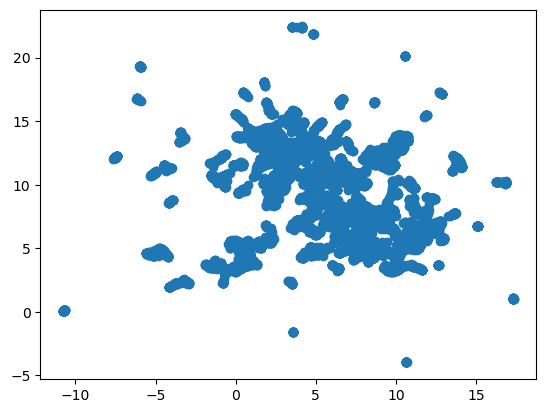

In [ ]:
X = umap.UMAP(n_jobs=-1, n_components=2).fit_transform(df)


In [ ]:

caller_type_label = np.array(caller_type_df).T
unique_call_type_label = np.unique(caller_type_label)

for label in unique_call_type_label:
    label_mask = np.all(caller_type_label == label, axis=0)
    # print('label',label)
    # print('label_mask',label_mask)
    # print('caller_type_label',caller_type_label)
    # Select data for this label
    data_for_label = X[label_mask]
    # Plot the data for this label with a label for the legend
    plt.scatter(data_for_label[:, 0], data_for_label[:, 1], label=label, alpha=0.5, s=8)
    # center prosition
    centroid = np.median(data_for_label, axis=0)
    # text label
    # plt.text(centroid[0], centroid[1], str(label), fontsize=6, color='black', ha='center', va='center')

# Add a legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=6)
plt.show()